In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline 

from keras import models
from keras import layers
from keras import optimizers

/Users/ianbenlolo/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
#picture dataset
from keras.datasets import mnist

In [ ]:
#imdb data set
from keras.datasets import imdb

In [2]:
#reuters data set(text)
from keras.datasets import reuters

In [2]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [3]:
x = np.random.random((10,1))
y = np.random.random((32, 10))

In [4]:
#arrays:
x = np.array([[0., 1.],
                 [2., 3.],
                 [4., 5.]])
print(x)
print(x.shape)
x

#reshaping arrays for like this. the dimensions have to match. 
x.reshape(1,6)
x

[[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]]
(3, 2)


array([[ 0.,  1.],
       [ 2.,  3.],
       [ 4.,  5.]])

In [5]:
#from keras.datasets import mnist

#this is just the MNIST data set

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

Using TensorFlow backend.


3
(60000, 28, 28)
uint8


In [6]:
#import matplotlib.pyplot as plt
#%matplotlib inline 

#digit = train_images[100]
#plt.imshow(digit, cmap=plt.cm.binary)
#plt.show()

In [7]:
#from keras.datasets import imdb

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
#vectorizing the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#makign them arrays of float32 precision
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [10]:
#from keras import models
#from keras import layers

#configure the model for training
model = models.Sequential()
#add layers--
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer,loss function and metrics are strings because they're part of Keras
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

#     to use custom losses and metrics:
#  from keras import losses
#  from keras import metrics


#  model.compile(optimizer=optimizers.RMSprop(lr=0.001),   
#            loss=losses.binary_crossentropy,
#            metrics=[metrics.binary_accuracy])


In [11]:
#from keras import optimizers

#configurating the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 388us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 5s 338us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [25]:

history_dict = history.history
history_dict.keys()


#iterate through all the keys
#for key, value in history_dict.items():
#    print key, value

#plot the data


[0.7813333335240682,
 0.90473333336512252,
 0.92846666660308841,
 0.94373333355585731,
 0.95426666638056434,
 0.96500000006357833,
 0.97046666682561233,
 0.97633333311080928,
 0.98213333330154418,
 0.98533333330154416,
 0.98906666657129927,
 0.9917333334922791,
 0.99286666666666668,
 0.9946666666666667,
 0.99819999999999998,
 0.99766666657129921,
 0.99926666666666664,
 0.99719999999999998,
 0.99973333358764649,
 0.99806666666666666]

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


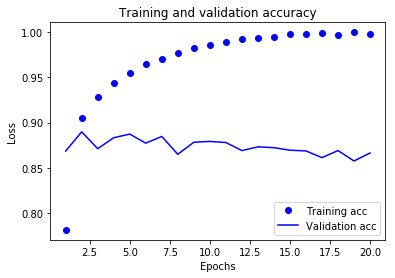

In [27]:
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#we can see training accuracy increases and loss decreases
# this is an example of overfitting
#       we could have stopped at 4 epochs


In [28]:
# could now use our network to predict likelyhood of positive reviews with:
model.predict(x_test)
# the network is confident for some values: 0.99, <0.1 but for some it is unsure: 0.5, 0.7

array([[ 0.00665166],
       [ 0.99999988],
       [ 0.59762663],
       ..., 
       [ 0.0020646 ],
       [ 0.01062515],
       [ 0.72914135]], dtype=float32)

In [33]:
#experimenting with different ~~LAYERS~~

#configure the model for training
model_2 = models.Sequential()

#add layers-- JUST ONE HIDDEN LAYER
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

#optimizer,loss function and metrics are strings because they're part of Keras
model_2.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

#configurating the optimizer
model_2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 460us/step - loss: 0.5389 - acc: 0.7775 - val_loss: 0.3889 - val_acc: 0.8626
Epoch 2/20
15000/15000 [==============================] - 6s 392us/step - loss: 0.3021 - acc: 0.8995 - val_loss: 0.2946 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 5s 341us/step - loss: 0.2057 - acc: 0.9297 - val_loss: 0.2820 - val_acc: 0.8877
Epoch 4/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1486 - acc: 0.9487 - val_loss: 0.3277 - val_acc: 0.8756
Epoch 5/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.1291 - acc: 0.9555 - val_loss: 0.3148 - val_acc: 0.8824
Epoch 6/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.0954 - acc: 0.9701 - val_loss: 0.3709 - val_acc: 0.8756
Epoch 7/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.0743 - acc: 0.9777 - val_loss: 0.4161 - 

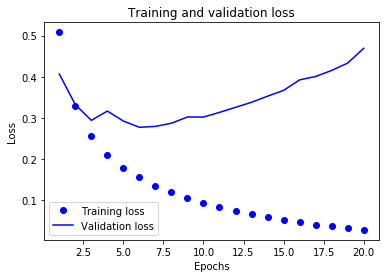

In [31]:
history_dict2 = history_2.history
loss_values2 = history_2_dict['loss']
val_loss_values2 = history_2_dict['val_loss']

epochs2 = range(1, len(loss_values2) + 1)

plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

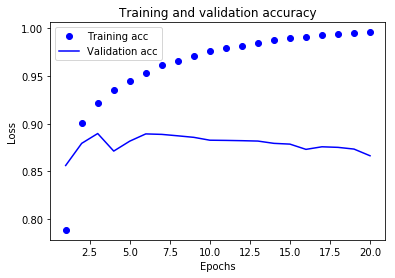

In [32]:
acc_values2 = history_2_dict['acc'] 
val_acc_values2 = history_2_dict['val_acc']

plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
def plotter(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.subplot(2,1,1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.ylabel('Loss')

    plt.title('Training and validation loss')
    plt.legend()

    #plotting  training and validation accuracy 
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.subplot(2,1,2)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel('Loss')

    plt.tight_layout()

    plt.legend()
    plt.show()

In [3]:
##reuters data set

#only 10,000 most common words
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [5]:
x_train = vectorize_sequences(train_data)
x_test =  vectorize_sequences(test_data)

In [6]:
#One Hot encoding
#def to_one_hot(labels, dimension=46):
#    results = np.zeros((len(labels), dimension))
#    for i, label in enumerate(labels):
#        results[i, label] = 1.
#    return results

#get the labels into One Hot labels, so they are binary and easy to classify
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)



#we could also encode using a built-in way with keras
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#these will be the 1000 samples to use as validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
#training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 374us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 231us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.0952 - acc: 0.7652 - val_loss: 1.1707 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0805 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 195us/step - loss: 0.7032 - acc: 0.8474 - val_loss: 0.9840 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 245us/step - loss: 0.5664 - acc: 0.8802 - val_loss: 0.9412 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 201us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9093 - val_acc: 0.8010


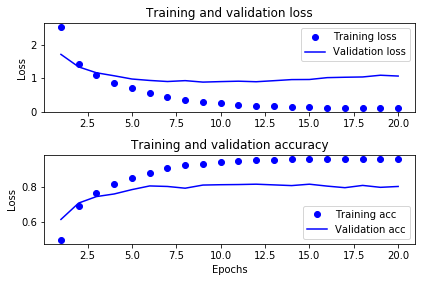

In [37]:
plotter(history)

In [39]:
#20 epochs results in overfitting after nine
#so we try until 9
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results
model.metrics_names

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 412us/step - loss: 2.6136 - acc: 0.4647 - val_loss: 1.7302 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 2s 192us/step - loss: 1.4080 - acc: 0.7081 - val_loss: 1.2760 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 177us/step - loss: 1.0433 - acc: 0.7781 - val_loss: 1.1044 - val_acc: 0.7640
Epoch 4/9
7982/7982 [==============================] - 2s 189us/step - loss: 0.8191 - acc: 0.8312 - val_loss: 1.0276 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.6518 - acc: 0.8626 - val_loss: 0.9518 - val_acc: 0.8060
Epoch 6/9
7982/7982 [==============================] - 2s 191us/step - loss: 0.5301 - acc: 0.8900 - val_loss: 0.9202 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.4209 - acc: 0.9104 - val_loss: 0.9011 - val_acc: 0.8150
Epoch 8

['loss', 'acc']

In [43]:
print(model.metrics_names)
print(results)

['loss', 'acc']
[0.9835918115274458, 0.7871772039711529]
